# K-means clustering Stock Returns

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.vq import kmeans,vq,whiten
from sklearn.cluster import KMeans

# Local Import
from utility import load_data

In [14]:
# Load the Data
df = load_data()
df.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,-0.0053,-0.0112,-0.0004,-0.0032,-0.0074,-0.0273,-0.0073,-0.0113,-0.0056,-0.0089,...,-0.0075,-0.0121,-0.0157,0.0008,-0.0096,-0.0053,-0.0057,-0.0108,-0.0060,-0.0026
2005-01-04,-0.0187,-0.0032,-0.0096,-0.0101,0.0056,-0.0076,-0.0137,-0.0038,-0.0113,-0.0137,...,-0.0180,-0.0217,-0.0184,-0.0113,-0.0041,-0.0104,-0.0048,-0.0167,-0.0151,-0.0134
2005-01-05,-0.0108,-0.0035,-0.0107,-0.0069,-0.0017,-0.0140,-0.0045,-0.0050,-0.0004,-0.0106,...,-0.0204,-0.0063,-0.0089,0.0000,-0.0095,-0.0036,0.0017,-0.0241,-0.0054,-0.0055
2005-01-06,-0.0006,0.0022,0.0083,0.0027,-0.0059,0.0044,0.0092,0.0070,0.0073,0.0042,...,0.0048,0.0028,0.0054,-0.0010,0.0102,0.0033,0.0047,0.0073,0.0127,0.0064
2005-01-07,-0.0054,0.0033,-0.0039,0.0027,0.0133,-0.0143,-0.0058,-0.0016,0.0069,-0.0006,...,-0.0079,-0.0050,-0.0066,-0.0003,-0.0022,-0.0065,-0.0040,0.0029,-0.0045,-0.0005


## Experiment 1: Cluster Correlation Matrix of daily returns (full time period)

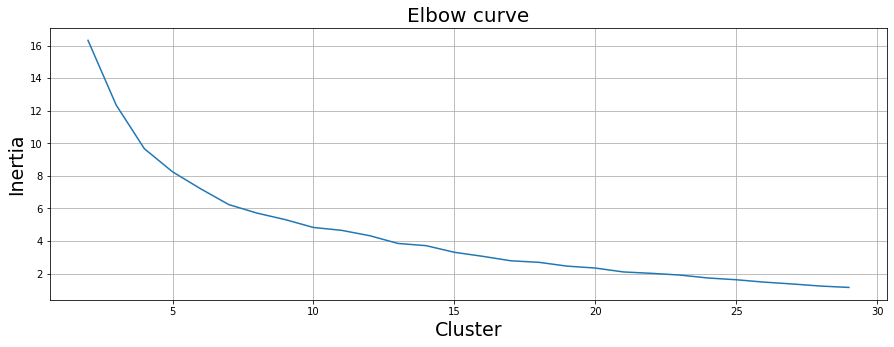

In [15]:
# Compute Correlation Matrix
corr = df.corr()

# Elbow Curve
def elbow_curve(df):
    distorsions = []
    for k in range(2, 30):
        k_means = KMeans(n_clusters=k)
        k_means.fit(df)
        distorsions.append(k_means.inertia_)

    fig = plt.figure(figsize=(15, 5))
    plt.plot(range(2,30), distorsions)
    plt.grid(True)
    plt.title('Elbow curve',fontsize = 20)
    plt.xlabel("Cluster",fontsize = 19)
    plt.ylabel("Inertia",fontsize = 19)
    plt.show()

elbow_curve(corr)

In [18]:
# K-Means Clusters

def cluster(data,k):
    # k: Set number of clusters
    # data: observations

    # compute K-Means
    centroids,distortion = kmeans(data,k)

    # assign each sample to a cluster
    idx,_ = vq(data,centroids)

    #Listing the Clusters
    details = [(name,cluster) for name, cluster in zip(data.index,idx)]
    return centroids, idx, sorted(details, key=lambda tup: tup[1])

In [19]:
centroids,idx,details = cluster(corr,9)
print(details)

[('Books', 0), ('Chems', 0), ('Rubbr', 0), ('BldMt', 0), ('Cnstr', 0), ('Mach', 0), ('ElcEq', 0), ('Autos', 0), ('Aero', 0), ('Telcm', 0), ('BusSv', 0), ('LabEq', 0), ('Paper', 0), ('Boxes', 0), ('Trans', 0), ('Whlsl', 0), ('Insur', 0), ('Fin', 0), ('Other', 0), ('Comps', 1), ('Chips', 1), ('Fun', 2), ('Banks', 2), ('Agric', 3), ('Soda', 3), ('Beer', 3), ('Smoke', 3), ('Guns', 3), ('Gold', 4), ('Steel', 5), ('FabPr', 5), ('Mines', 5), ('Oil', 5), ('Toys', 6), ('Clths', 6), ('Txtls', 6), ('Rtail', 6), ('Meals', 6), ('RlEst', 6), ('Coal', 7), ('Food', 8), ('Hshld', 8), ('Hlth', 8), ('MedEq', 8), ('Drugs', 8), ('Ships', 8), ('Util', 8), ('PerSv', 8)]


## Experiment 2: Cluster daily returns and daily std (full time period)

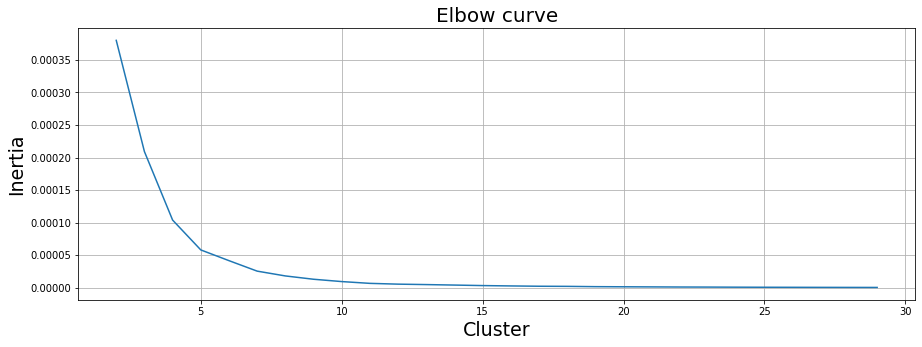

In [33]:
# Building the dataset
r_avg = df.mean()
r_std = df.std()

# Concat the two series to feed them into the K-Means algorithm
df_new = pd.concat([r_avg ,r_std],axis=1,keys=['d_avg_return','d_avg_std'])

# Elbow Curve
elbow_curve(df_new)

In [34]:
k = 7
centroids, idx, details = cluster(df_new,k)
print(details)

[('Soda', 0), ('Hlth', 0), ('Guns', 0), ('Telcm', 0), ('BusSv', 0), ('Paper', 0), ('Whlsl', 0), ('Rtail', 0), ('Meals', 0), ('Other', 0), ('Fun', 1), ('Txtls', 1), ('Cnstr', 1), ('FabPr', 1), ('Banks', 1), ('RlEst', 1), ('Fin', 1), ('Coal', 2), ('Agric', 3), ('BldMt', 3), ('Mach', 3), ('Autos', 3), ('Ships', 3), ('Oil', 3), ('Food', 4), ('Beer', 4), ('Smoke', 4), ('Hshld', 4), ('MedEq', 4), ('Drugs', 4), ('Util', 4), ('Steel', 5), ('Gold', 5), ('Mines', 5), ('Toys', 6), ('Books', 6), ('Clths', 6), ('Chems', 6), ('Rubbr', 6), ('ElcEq', 6), ('Aero', 6), ('PerSv', 6), ('Comps', 6), ('Chips', 6), ('LabEq', 6), ('Boxes', 6), ('Trans', 6), ('Insur', 6)]


In [35]:
# Functions for plotting the clusters

#Function for setting the Color
def getColor(N, i):
    import matplotlib as mpl
    cmap = plt.get_cmap(name = 'tab10')
    norm = mpl.colors.Normalize(vmin=0.0, vmax=N - 1)
    return cmap(norm(i))

def plot_clusters(df,k,idx,centroids):
    # Plotting the two variables as clusters
    for i in range(0,k+1):
        plt.scatter(df.iloc[idx==i,1],df.iloc[idx==i,0],color = getColor(k,i),marker='o')

    plt.plot(centroids[:,1],centroids[:,0],'sg',markersize=8,label = 'Centroid')
    plt.title('K-Means Cluster',fontsize = 20)
    plt.xlabel("Volatility",fontsize = 18)
    plt.ylabel("Return",fontsize = 18)
    plt.legend()
    plt.show()


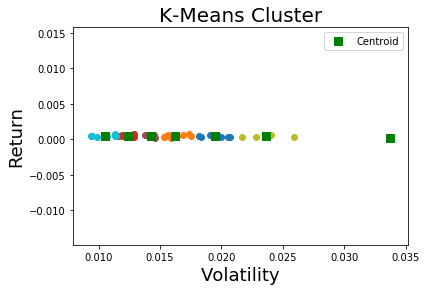

In [12]:
# Visualizing the clusters
plot_clusters(df_new,k,idx,centroids)

## Experiment 3: Cluster weekly returns and weekly std (full time period)

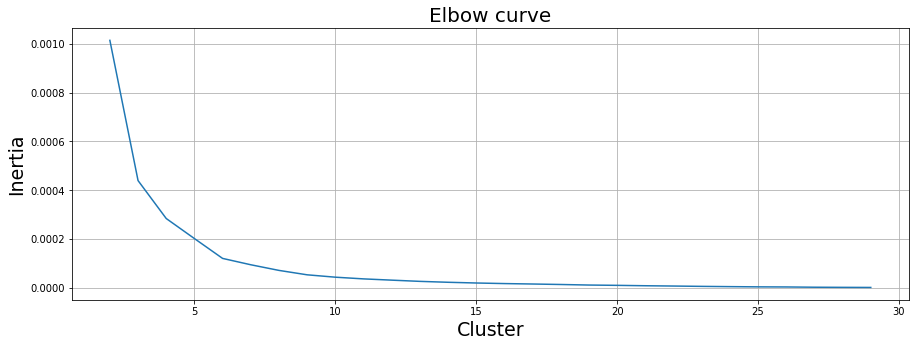

In [39]:
# Resample returns
df_new = df.drop('Coal',axis=1)
df_new = (df_new+1).resample("W").prod()-1

# Building the dataset
r_avg = df_new.mean()
r_std = df_new.std()

# Concat the two series to feed them into the K-Means algorithm
df_new = pd.concat([r_avg,r_std],axis=1,keys=['w_avg_return','w_avg_std'])

# Elbow Curve
elbow_curve(df_new)

In [40]:
k = 6
centroids, idx, details = cluster(df_new,k)
print(details)

[('Steel', 0), ('Gold', 0), ('Mines', 0), ('Soda', 1), ('Smoke', 1), ('Hlth', 1), ('MedEq', 1), ('Guns', 1), ('Telcm', 1), ('BusSv', 1), ('Paper', 1), ('Whlsl', 1), ('Rtail', 1), ('Meals', 1), ('Other', 1), ('Food', 2), ('Beer', 2), ('Hshld', 2), ('Drugs', 2), ('Util', 2), ('Fun', 3), ('Txtls', 3), ('Cnstr', 3), ('FabPr', 3), ('Autos', 3), ('Banks', 3), ('RlEst', 3), ('Toys', 4), ('Chems', 4), ('Rubbr', 4), ('ElcEq', 4), ('Aero', 4), ('PerSv', 4), ('Comps', 4), ('Chips', 4), ('LabEq', 4), ('Boxes', 4), ('Trans', 4), ('Insur', 4), ('Agric', 5), ('Books', 5), ('Clths', 5), ('BldMt', 5), ('Mach', 5), ('Ships', 5), ('Oil', 5), ('Fin', 5)]


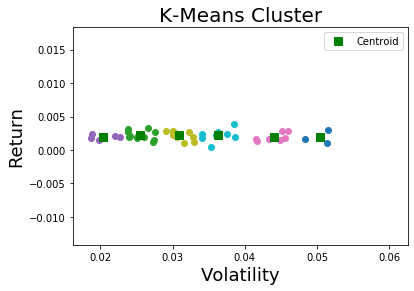

In [41]:
# Visualizing the clusters
plot_clusters(df_new,k,idx,centroids)

In [ ]:
# Further Topics
# http://www.turingfinance.com/clustering-countries-real-gdp-growth-part2/
# https://pdfs.semanticscholar.org/7ef1/48bfa1d793afcf84dd76a43153d243ecafd0.pdf
# https://www.sciencedirect.com/science/article/pii/S0927539802000713